### 전국횡단보도표준데이터
* 횡단보도 연장, 녹색신호시간의 상관도
* 자전거 횡단도 겸용 비율(전체대비)
* 차로수별 자전거 횡단도 카운트/비율
* 차로수별 보행자 신호등 유무 카운트/비율
* 차로수별 음향신호기설치 유무 카운트/비율

화면출력
1. 상관도 수치
2. 비율 수치
3~5. 카운트,비율

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def yes_ratio(np_data):
    pass1 = dict()
    for road, y_n in np_data:
        if road in pass1.keys():
            pass1[road].append(y_n)
        else:
            pass1[road] = [y_n]

    pass2 = []
    for road in pass1:
        val, cnt = np.unique(pass1[road], return_counts=True)
        y, ratio = 0,0
        if 'Y' in val:
            y = cnt[val=='Y']
        ratio = y*100/np.sum(cnt)
        pass2.append((int(road), int(y), float(ratio)))

    np.set_printoptions(precision=3, suppress=True)
    pass3 = sorted(pass2, key=lambda x:x[0])
    pass3 = np.array(pass3)
    print(pass3)

csv_data=[]
with open('전국횡단보도표준데이터.csv') as f:
    for line in f:
        csv_data.append(my_split(line[:-1]))
print(csv_data[:3])
for i in enumerate(csv_data[0]):
    print(i)

[['시도명', '시군구명', '도로명', '소재지도로명주소', '소재지지번주소', '횡단보도관리번호', '횡단보도종류', '자전거횡단도겸용여부', '고원식적용여부', '위도', '경도', '차로수', '횡단보도폭', '횡단보도연장', '보행자신호등유무', '보행자작동신호기유무', '음향신호기설치여부', '녹색신호시간', '적색신호시간', '교통섬유무', '보도턱낮춤여부', '점자블록유무', '집중조명시설유무', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드', '제공기관명'], ['경기도', '남양주시', '강변북로', '', '경기도 남양주시 다산동 6288', '450', '01', 'Y', 'N', '37.601593', '127.177871', '3', '6.5', '9.7', 'Y', 'Y', 'Y', '17', '96', 'N', 'Y', 'Y', 'Y', '경기도 남양주시청', '031-590-2114', '2023-01-31', '3990000', '경기도 남양주시'], ['경기도', '남양주시', '강변북로', '', '경기도 남양주시 다산동 6288', '451', '01', 'Y', 'N', '37.596648', '127.173525', '9', '8.9', '30', 'Y', 'Y', 'Y', '37', '147', 'N', 'Y', 'Y', 'Y', '경기도 남양주시청', '031-590-2114', '2023-01-31', '3990000', '경기도 남양주시']]
(0, '시도명')
(1, '시군구명')
(2, '도로명')
(3, '소재지도로명주소')
(4, '소재지지번주소')
(5, '횡단보도관리번호')
(6, '횡단보도종류')
(7, '자전거횡단도겸용여부')
(8, '고원식적용여부')
(9, '위도')
(10, '경도')
(11, '차로수')
(12, '횡단보도폭')
(13, '횡단보도연장')
(14, '보행자신호등유무')
(15, '보행자작동신호기유무')
(16, '음향신호기설치여부')
(17, '녹

In [29]:
np_data = np.array(csv_data[1:])
np_data.shape

(50000, 28)

0.12634133931481506


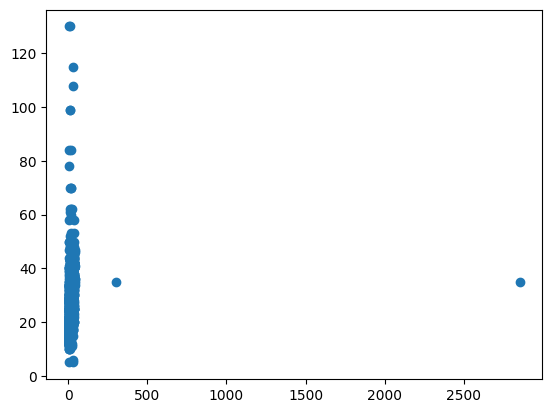

In [43]:
filter1 = (np_data[:,17]!='') & (np_data[:,13]!='') & (np_data[:,13]!='0') & (np_data[:,17]!='0')
np_data_f1 = np_data[filter1]
np_data_green_length = np_data_f1[:,[13,17]].astype(np.float64)
get_corr=np.corrcoef(np_data_green_length[:,0],np_data_green_length[:,1])
print(get_corr[0][1])
_,axe = plt.subplots()
axe.scatter(np_data_green_length[:,0],np_data_green_length[:,1])

In [31]:
filter2 = (np_data[:,7]!='') & (np_data[:,7]!=' ')
np_data_f2 = np_data[filter2]
bike_y_n, bike_count = np.unique(np_data_f2[:,7],return_counts=True)
print(bike_y_n,bike_count)
print(bike_count[1]*100/np.sum(bike_count),'%')

['N' 'Y'] [29476  4614]
13.534760926958052 %


In [32]:
filter3 = (np_data[:,7]!='') & (np_data[:,7]!=' ') & (np_data[:,11]!='')
np_data_f3 = np_data[filter3]
np_data_f3 = np_data_f3[:,[11,7]]
yes_ratio(np_data_f3)

[[   0.       0.       0.   ]
 [   1.     423.       6.42 ]
 [   2.     859.       6.444]
 [   3.     489.      19.222]
 [   4.    1002.      17.691]
 [   5.     525.      25.024]
 [   6.     593.      28.885]
 [   7.     371.      38.848]
 [   8.     166.      33.2  ]
 [   9.     125.      50.403]
 [  10.      39.      51.316]
 [  11.      12.      66.667]
 [  12.       7.      77.778]
 [  13.       3.     100.   ]]


In [40]:
filter4 = (np_data[:,11]!='') & (np_data[:,14]!='')
f1 = np_data_f4[:,0]=='15'
np_data_f4 = np_data[filter4]
np_data_f4 = np_data_f4[:,[11,14]]
print(np.unique(np_data_f4[f1],return_counts=True))
for e in np_data_f4:
    if e[1] == 'n':
        e[1] = 'N'
    if e[1] == 'y':
        e[1] = 'Y'
yes_ratio(np_data_f4)

(array(['15', 'Y'], dtype='<U49'), array([2, 2], dtype=int64))
[[   0.       2.     100.   ]
 [   1.     432.       5.061]
 [   2.    3782.      19.473]
 [   3.    1848.      51.405]
 [   4.    6200.      68.889]
 [   5.    3013.      91.664]
 [   6.    2719.      90.093]
 [   7.    1546.      96.807]
 [   8.     797.      97.912]
 [   9.     444.      97.582]
 [  10.     166.      93.258]
 [  11.      51.      96.226]
 [  12.      22.      95.652]
 [  13.      16.      88.889]
 [  15.       2.     100.   ]]


In [35]:
filter5 = (np_data[:,16]!=' ') & (np_data[:,16]!='') & (np_data[:,11]!='')
np_data_f5 = np_data[filter5]
np_data_f5 = np_data_f5[:,[11,16]]
for e in np_data_f5:
    if e[1] == 'n':
        e[1] = 'N'
    if e[1] == 'y':
        e[1] = 'Y'
yes_ratio(np_data_f5)

[[  0.      2.    100.   ]
 [  1.     64.      1.806]
 [  2.    582.      7.807]
 [  3.    363.     19.6  ]
 [  4.    890.     25.575]
 [  5.    571.     36.208]
 [  6.    471.     40.499]
 [  7.    300.     43.86 ]
 [  8.    183.     51.695]
 [  9.     81.     46.023]
 [ 10.     10.     50.   ]
 [ 11.      2.     50.   ]]
